In [164]:
from sympy import *
from sympy.vector import CoordSys3D
sqrt(2)


sqrt(2)

In [165]:
N = CoordSys3D('N')
x, y = symbols('x, y')
F = (3 + 2 * x * y) * N.i + (x ** 2 - 3 * y ** 2) * N.j

# a) show that F is conservative
Fxy = diff(F.dot(N.i), y)
Fyx = diff(F.dot(N.j), x)
print('Fxy:', Fxy)
print('Fyx:', Fyx)

if Fxy == Fyx:
    print(F, 'is conservative!')
else:
    print(F, 'is not conservative!')

print(curl(F))

Fxy: 2*x
Fyx: 2*x
(2*x*y + 3)*N.i + (x**2 - 3*y**2)*N.j is conservative!
0


In [2]:
# b) find a function f(x, y) such that F = \grad f
from sympy.vector import scalar_potential
f = Function('f')(x,y)
conservative_field = (3 + 2 * N.x * N.y) * N.i + (N.x ** 2 - 3 * N.y ** 2) * N.j
scalar_potential(conservative_field, N)


N.x**2*N.y + 3*N.x - N.y**3

In [3]:
x, y, z = symbols ('x,y,z')
expr = exp(x*y*z)
deriv = Derivative(expr, x, y, 2, z, 4)
print(simplify(deriv))

x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)


In [4]:
2*pi*integrate(x*sqrt(1+4*x**2), (x, 0, 3))

2*pi*(-1/12 + 37*sqrt(37)/12)

In [168]:
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import r, x, y, z, theta, phi, u, v
param_sphere = ParametricRegion((cos(theta)*sin(phi), sin(theta)*sin(phi),cos(phi)), (theta, 0, 2*pi),(phi, 0, pi))
x = cos(theta)*sin(phi)
vector_integrate(x**2,param_sphere)

4*pi/3

In [6]:
surface = ParametricRegion((u, v, u + v ** 2), (u, 0, 1), (v, 0, 2))
vector_integrate(v, surface)

13*sqrt(2)/3

In [104]:
# hand in 
# 1
y = r * sin(theta)
z = r * cos(theta)
parametric_plane = ParametricRegion(((12 + 3 * y - z)/3, y, z), (r, 0, pi), (theta, 0, 2 * pi))
vector_integrate(1, parametric_plane)

sqrt(19)*pi**3/3

In [105]:
x = (12 + 3 * y - z)/3

V = x * N.i + y * N.j + z * N.k
print(V)
Vr = diff(V, r)
Vt = diff(V, theta)
print(Vr)
print(Vt)
m = Vr.cross(Vt).magnitude()
print(m)

(r*sin(theta) - r*cos(theta)/3 + 4)*N.i + (r*sin(theta))*N.j + (r*cos(theta))*N.k
(sin(theta) - cos(theta)/3)*N.i + (sin(theta))*N.j + (cos(theta))*N.k
(r*sin(theta)/3 + r*cos(theta))*N.i + (r*cos(theta))*N.j + (-r*sin(theta))*N.k
sqrt((-r*sin(theta)**2 - r*cos(theta)**2)**2 + (r*(sin(theta) - cos(theta)/3)*sin(theta) + (r*sin(theta)/3 + r*cos(theta))*cos(theta))**2 + (r*(sin(theta) - cos(theta)/3)*cos(theta) + (-r*sin(theta)/3 - r*cos(theta))*sin(theta))**2)


In [106]:
integrate(m,(r, 0, pi), (theta, 0, 2 * pi) )

sqrt(19)*pi**3/3

In [8]:
# hand in 2
from sympy.abc import r, x, y, z, theta, phi, u, v
P = exp(y) + 4 * x ** 3 * y ** 3 - y * x
Q = x * exp(y) + 3 * x ** 4 * y ** 2 - 3 * x - cos(y ** 3)
Qx = diff(Q, x)
Py = diff(P, y) 
print(simplify(Qx - Py))
from sympy.geometry import Point, Polygon
triangle = ParametricRegion((x, y), (x, -y, y), (y, 0, 1))
vector_integrate(Qx - Py , triangle)

x - 3


-3

In [169]:
# workshop 7
# 1
from sympy import *
from sympy.abc import a, b, c, r, x, y, z, theta, phi, u, v
from sympy.vector import CoordSys3D

N = CoordSys3D('N')
F = (1 + a * N.x ** 2 * N.y ** 2 * N.z) * N.i + 2 * N.x ** 3 * N.y * N.z * N.j + (N.x ** 3 * N.y ** 2 + b * N.y) * N.k
from sympy.vector import curl, scalar_potential
Cf = curl(F)
e1 = Cf.dot(N.i)
e2 = Cf.dot(N.j)
e3 = Cf.dot(N.k)
solution = solve((e1, e2, e3), a , b)
print(solution)
conservative_field = F.subs(a, solution[a]).subs(b, solution[b])
print(conservative_field)

{b: 0, a: 3}
(3*N.x**2*N.y**2*N.z + 1)*N.i + 2*N.x**3*N.y*N.z*N.j + N.x**3*N.y**2*N.k


In [6]:
phi = scalar_potential(conservative_field, N)
phi
# b


N.x**3*N.y**2*N.z + N.x

In [7]:
print(phi.subs(N.x, 1).subs(N.y, 2).subs(N.z, 3) - phi.subs(N.x, 0).subs(N.y, 0).subs(N.z, 0))

13


In [31]:
# 2 the portion of x^2 + y^2 + z^2 = 16z , in z = x^2 + y^2
from sympy.vector import *
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import r, x, y, z, theta, phi, u, v
# 
phi_end = acos(Rational(7, 8))
u_end = sin(phi_end)
param_sphere = ParametricRegion((8*cos(theta)*sin(phi), 8*sin(theta)*sin(phi), 8+8*cos(phi)), (theta, 0, 2*pi),(phi, 0, phi_end))
X = 8*cos(theta)*sin(phi)
Y = 8*sin(theta)*sin(phi)
Z = 8+8*cos(phi)
X_theta = diff(X, theta) * N.i 
X_phi   = diff(X, phi)   * N.i
Y_theta = diff(Y, theta) * N.j
Y_phi   = diff(Y, phi)   * N.j
Z_theta = diff(Z, theta) * N.k
Z_phi   = diff(Z, phi)   * N.k
v_theta = X_theta + Y_theta + Z_theta
v_phi   = X_phi + Y_phi + Z_phi
m = simplify((v_theta.cross(v_phi)).magnitude())
print(m)
vector_integrate(1, param_sphere)

64*sqrt(sin(phi)**2)


16*pi

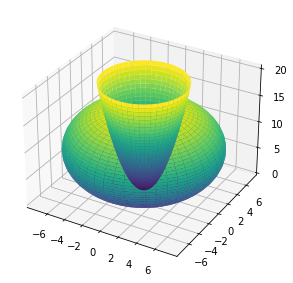

In [170]:
from sympy.plotting import plot, plot3d, plot3d_parametric_surface
#p1 = plot3d_parametric_surface(8*cos(theta)*sin(phi), 8*sin(theta)*sin(phi),8+8*cos(phi), (theta, 0, 2*pi),(phi, 0, pi))
#p2 = plot3d_parametric_surface(r*cos(theta), r*sin(theta), r**2, (theta, 0, 2*pi), (r,0,9))
plot3d_parametric_surface(
    (8*cos(theta)*sin(phi), 8*sin(theta)*sin(phi),8+8*cos(phi), (theta, 0, 2*pi),(phi, 0, pi)),
    (r*cos(theta), r*sin(theta), r**2, (theta, 0, 2*pi), (r,0,4.5)))

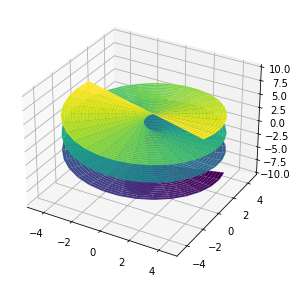

In [50]:
p = plot3d_parametric_surface(
        (x*sin(z), x*cos(z), z, (x, -5, 5), (z, -5, 5)),
        (sin(x + y), cos(x - y), x - y, (x, -5, 5), (y, -5, 5)))

In [10]:
# quiz 1
#Use Green's Theorem to evaluate
#∫C(x**2−3y)dx+2xdy
#where C is the circle y2+x2=4.
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
implicit_circle = ImplicitRegion((N.x, N.y), N.x ** 2 + N.y ** 2 - 4)
P = N.x ** 2 - 3 * N.y
Q = 2 * N.x 
vector_integrate(P * N.i + Q * N.j, implicit_circle)


20*pi

In [11]:
Qx = diff(Q, N.x)
Py = diff(P, N.y)
print(Qx - Py)


5


In [12]:
from sympy.abc import r, theta, phi, u, v
parametice_circle = ParametricRegion((r*cos(theta), r*sin(theta)), 
                                     (r,0,2),(theta,0,2*pi))
vector_integrate(Qx - Py, parametice_circle)

20*pi

In [21]:
# quiz 2 
# why two answer not same !!!!
#Find the work done by the force field
# F(x,y)=(3ex−y3)i^+(2cos(y)+x3)j^
# on a particle that travels once around the unit circle C in the counterclockwise direction. Use Green's Theorem if that simplifies the calculation of the integral.
from sympy.abc import r, x, y, z, theta, phi, u, v

F = ( 3 * exp(N.x) - N.y ** 3) * N.i + (2 * cos(N.y) + N.x ** 3) * N.j
Qx = diff(F.dot(N.j), N.x)
Py = diff(F.dot(N.i), N.y)
print(Qx - Py)
implicit_circle = ImplicitRegion((N.x, N.y), N.x ** 2 + N.y ** 2 - 1)
parametice_circle = ParametricRegion((r*cos(theta),r*sin(theta)), (r, 0, 1), (theta, 0, 2 * pi))
# to use green theorem need to remember: intergral in the region not on the board the answer is wrong 
vector_integrate(Qx - Py , implicit_circle) 

3*N.x**2 + 3*N.y**2


6*pi

In [22]:
vector_integrate(Qx - Py , parametice_circle)

3*pi/2

In [23]:
vector_integrate(F, implicit_circle)

3*pi/2

In [14]:
# quiz 3
# \mathbf{F}(x,y,z) = {4\,x^2\,y} \mathbf{\hat{i}}+{2\,y^3\,z} \mathbf{\hat{j}}+{5\,z} \mathbf{\hat{k}}.
from sympy.vector import divergence, curl
F = 4 * N.x ** 2 * N.y * N.i + 2 * N.y ** 3 * N.z * N.j + 5 * N.z * N.k
divergence(F)

8*N.x*N.y + 6*N.y**2*N.z + 5

In [15]:
curl(F)

(-2*N.y**3)*N.i + (-4*N.x**2)*N.k

In [16]:
# quiz 4
# F(x,y,z)=4xyi^−3sin(z)j^+6k^.
F = 4 * N.x * N.y * N.i - 3 * sin(N.z) * N.j + 6 * N.k
divergence(F)

4*N.y

In [17]:
curl(F)

(3*cos(N.z))*N.i + (-4*N.x)*N.k

In [67]:
# quiz 6 
# x + y + z = 1
F = 4 * x * (1 - x - y)
# x + y +z = 1 can be parametrilize as 
# x = x; y = y; z = 1-x-y
#vector_integrate(1, triangle)
triangle = ParametricRegion((x, y), (y, 0, 1-x), (x, 0, 1))
Rx = N.i - N.k
Ry = N.j - N.k
m = simplify((Rx.cross(Ry)).magnitude())

vector_integrate(F, triangle)*m

sqrt(3)/6

In [98]:
# p811
from sympy.abc import r, x, y, z, theta, phi, u, v
N = CoordSys3D('N')

X = r * cos(theta) * N.i
Y = r * sin(theta) * N.j
Z = (1 + r * cos(theta)) * N.k
V = X + Y + Z
Vr = diff(V,r)
print(Vr)
Vt = diff(V,theta)
print(Vt)
m = simplify(Vr.cross(Vt).magnitude())
print(m)
S = integrate(m, (r, 0, 1),(theta, 0, 2*pi))
print(S)

(cos(theta))*N.i + (sin(theta))*N.j + (cos(theta))*N.k
(-r*sin(theta))*N.i + (r*cos(theta))*N.j + (-r*sin(theta))*N.k
sqrt(2)*sqrt(r**2)
sqrt(2)*pi


In [171]:
# to find a model according expotential function,
# to see whethen and when we need a 4th jab against covid-19

# suppost the general function is
a, b, c, d, t = symbols ('a, b, c, d, t')
T = a * exp(t) + b * t + c * t ** 2 + d

E1 = T.subs(t, 0) 
E2 = T.subs(t, 1) - 21
E3 = T.subs(t, 2) - 150
E4 = T.subs(t, 3) - 3000
solution = solve((E1, E3, E2, E4), a, b, c, d)
print(solution)
print(solution[a].evalf())
print(solution[b].evalf())
print(solution[c].evalf())
print(solution[d].evalf())

T = T.subs(a, solution[a]).subs(c, solution[c]).subs(b, solution[b]).subs(d, solution[d])
print(T.subs(t,1).evalf())

{a: 2613/(-3*exp(2) - 1 + 3*E + exp(3)), b: (-7905 - 66*exp(2) + 2745*E)/(-4*E + 2 + 2*exp(2)), c: (-2721 + 108*E)/(-2 + 2*E), d: -2613/(-3*exp(2) - 1 + 3*E + exp(3))}
515.058095800904
-157.662399090636
-706.352567524775
-515.058095800904
21.0000000000000
